# Tree based algorithms

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import metrics

## Create dataset

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

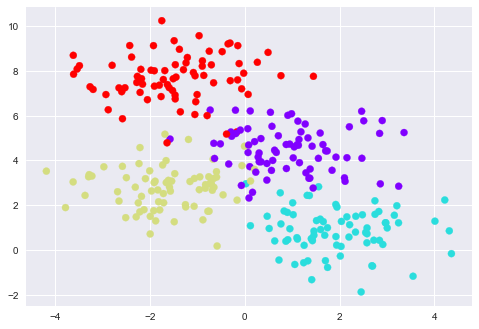

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [4]:
def visualizeClassifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
              clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
#     model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                        np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    

## Splitting data for training and testing

In [5]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=0)

## Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(Xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

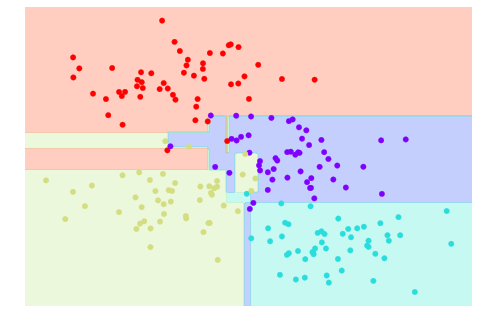

In [7]:
visualizeClassifier(dt, Xtrain, ytrain)

## Metrics

In [8]:
ypred = dt.predict(Xtest)
# (true labels, predicted)
print("Accuracy:", metrics.accuracy_score(ytest, ypred))
# (true labels, predicted)
print("Confusion Matrix:\n", metrics.confusion_matrix(ytest, ypred))
# (predicted, true labels)
print("Classification Report:\n", metrics.classification_report(ypred, ytest))


Accuracy: 0.9090909090909091
Confusion Matrix:
 [[19  1  3  0]
 [ 1 24  0  0]
 [ 1  0 24  2]
 [ 1  0  0 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84        22
           1       0.96      0.96      0.96        25
           2       0.89      0.89      0.89        27
           3       0.96      0.92      0.94        25

   micro avg       0.91      0.91      0.91        99
   macro avg       0.91      0.91      0.91        99
weighted avg       0.91      0.91      0.91        99



## Using Pima Indian Diabetes dataset

In [9]:
import pandas as pd

In [10]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv")
pima.columns = col_names

In [11]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=0)

In [13]:
dt = DecisionTreeClassifier()
dt.fit(Xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
ypred = dt.predict(Xtest)
# (true labels, predicted)
print("Accuracy:", metrics.accuracy_score(ytest, ypred))
# (true labels, predicted)
print("Confusion Matrix:\n", metrics.confusion_matrix(ytest, ypred))
# (predicted, true labels)
print("Classification Report:\n", metrics.classification_report(ypred, ytest))


Accuracy: 0.7125984251968503
Confusion Matrix:
 [[135  35]
 [ 38  46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79       173
           1       0.55      0.57      0.56        81

   micro avg       0.71      0.71      0.71       254
   macro avg       0.67      0.67      0.67       254
weighted avg       0.72      0.71      0.71       254



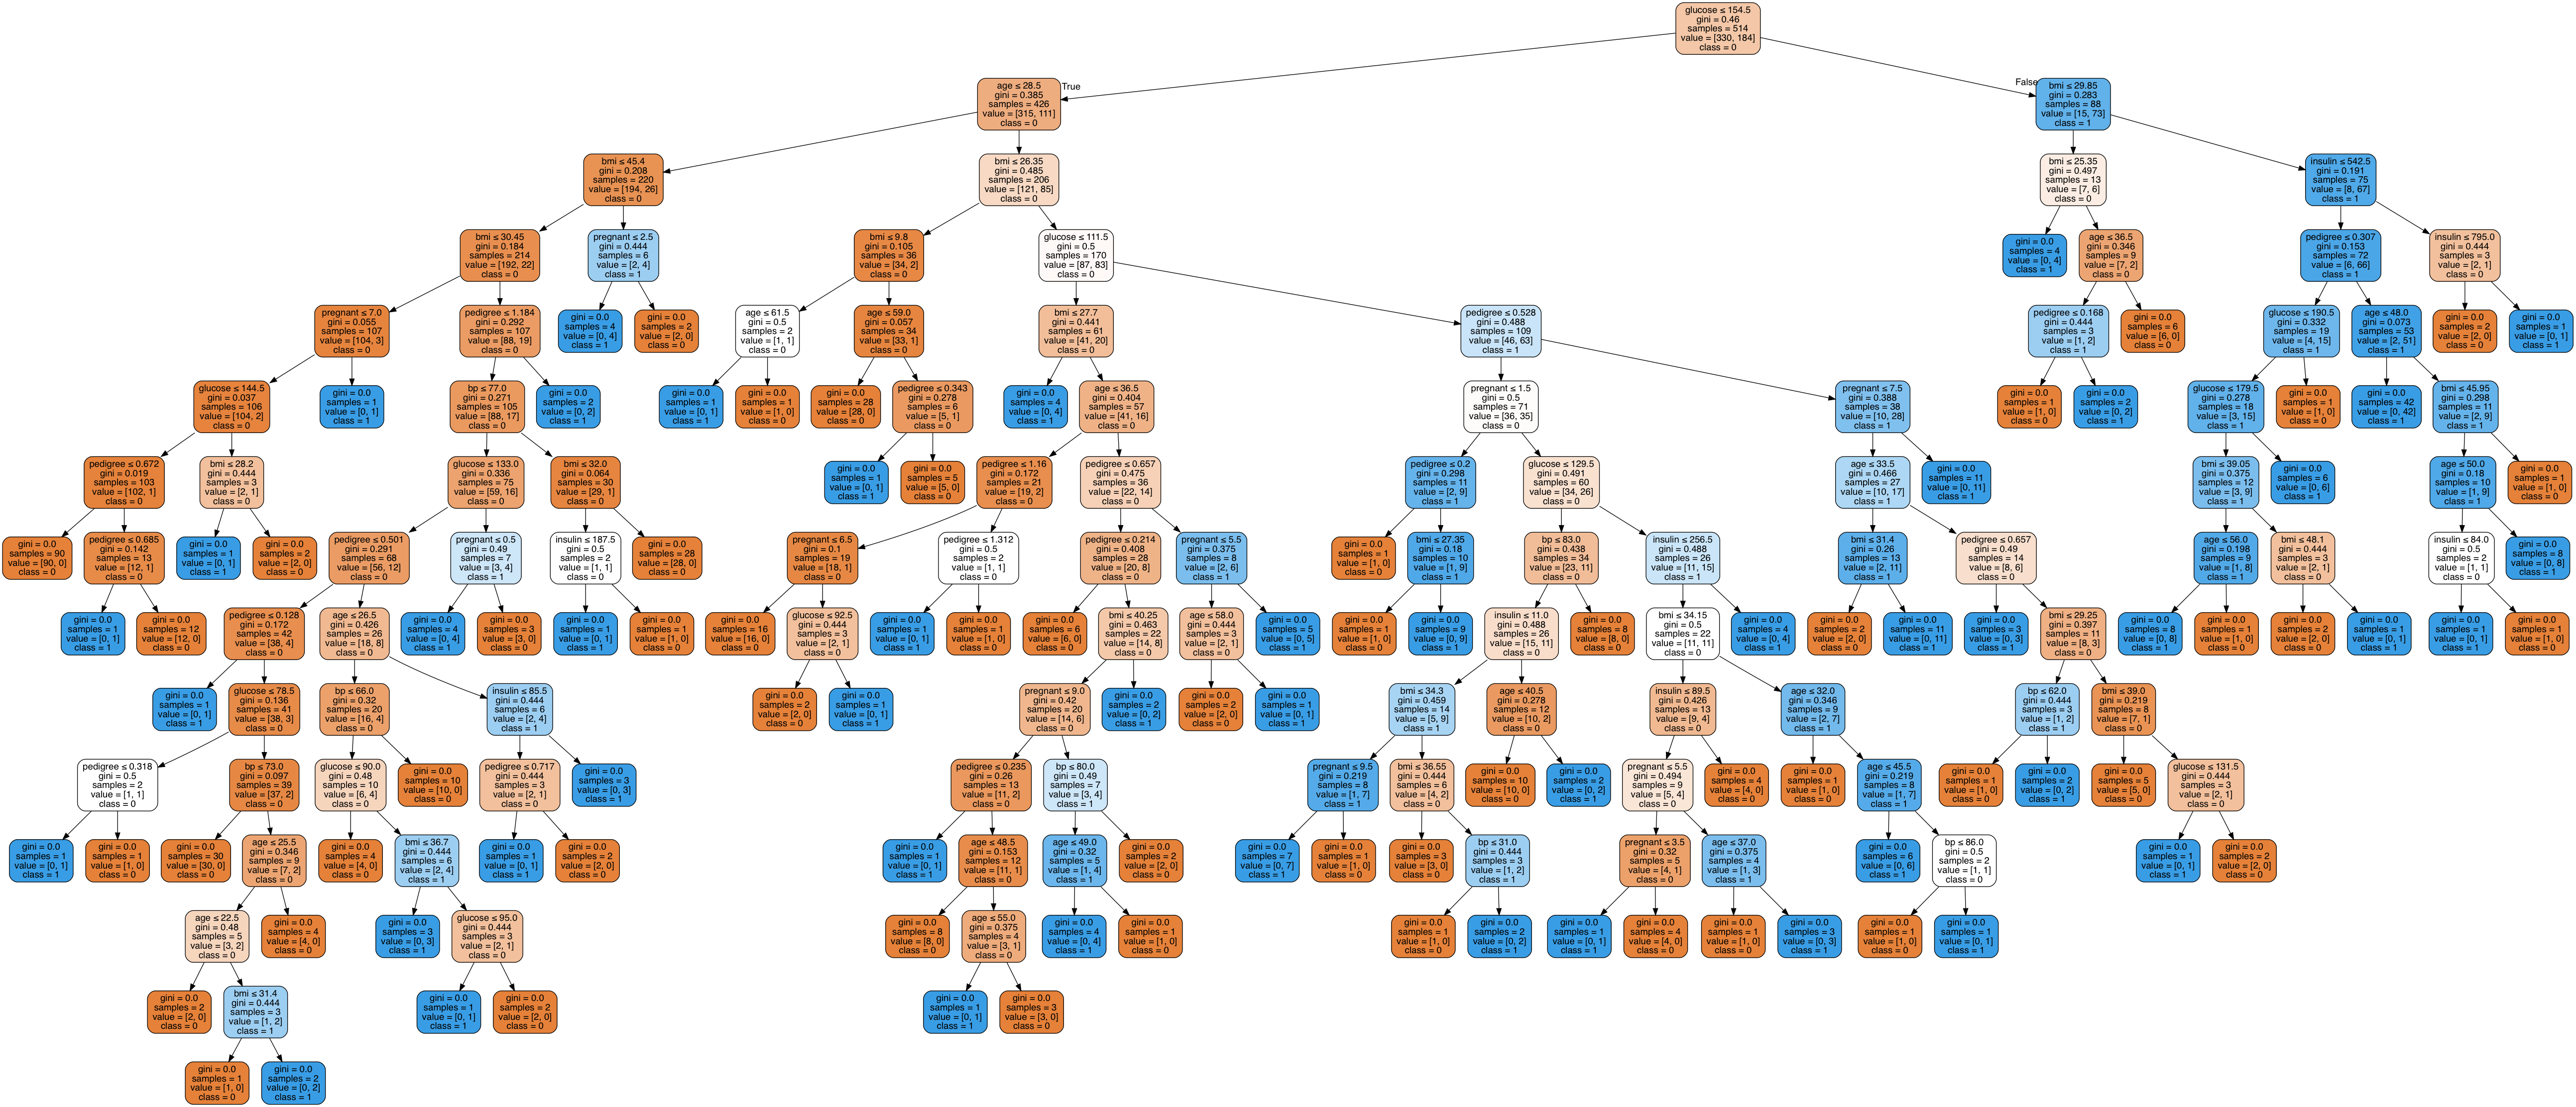

In [15]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Optimizing Decision Tree performance

In [16]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt.fit(Xtrain, ytrain)

ypred = dt.predict(Xtest)
# (true labels, predicted)
print("Accuracy:", metrics.accuracy_score(ytest, ypred))
# (true labels, predicted)
print("Confusion Matrix:\n", metrics.confusion_matrix(ytest, ypred))
# (predicted, true labels)
print("Classification Report:\n", metrics.classification_report(ypred, ytest))


Accuracy: 0.7165354330708661
Confusion Matrix:
 [[163   7]
 [ 65  19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.71      0.82       228
           1       0.23      0.73      0.35        26

   micro avg       0.72      0.72      0.72       254
   macro avg       0.59      0.72      0.58       254
weighted avg       0.88      0.72      0.77       254



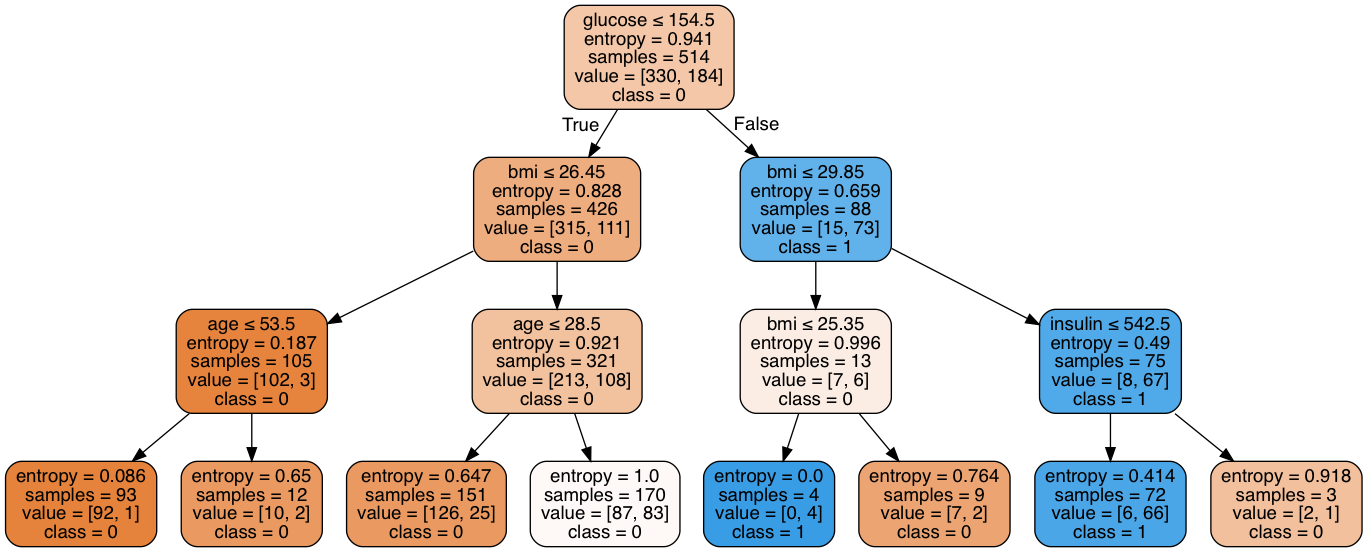

In [17]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(Xtrain, ytrain)

ypred = dt.predict(Xtest)
# (true labels, predicted)
print("Accuracy:", metrics.accuracy_score(ytest, ypred)*100)
# (true labels, predicted)
print("Confusion Matrix:\n", metrics.confusion_matrix(ytest, ypred))
# (predicted, true labels)
print("Classification Report:\n", metrics.classification_report(ypred, ytest))


Accuracy: 71.65354330708661
Confusion Matrix:
 [[163   7]
 [ 65  19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.71      0.82       228
           1       0.23      0.73      0.35        26

   micro avg       0.72      0.72      0.72       254
   macro avg       0.59      0.72      0.58       254
weighted avg       0.88      0.72      0.77       254



## Bagging decision trees

In [19]:
from sklearn.ensemble import BaggingClassifier

# dt = DecisionTreeClassifier()
bag = BaggingClassifier(dt, n_estimators=100, max_samples=0.8,
                       random_state=0)

bag.fit(Xtrain, ytrain)

ypred = dt.predict(Xtest)
# (true labels, predicted)
print("Accuracy:", metrics.accuracy_score(ytest, ypred)*100)
# (true labels, predicted)
print("Confusion Matrix:\n", metrics.confusion_matrix(ytest, ypred))
# (predicted, true labels)
print("Classification Report:\n", metrics.classification_report(ypred, ytest))


Accuracy: 71.65354330708661
Confusion Matrix:
 [[163   7]
 [ 65  19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.71      0.82       228
           1       0.23      0.73      0.35        26

   micro avg       0.72      0.72      0.72       254
   macro avg       0.59      0.72      0.58       254
weighted avg       0.88      0.72      0.77       254



TypeError: '(slice(None, None, None), 0)' is an invalid key

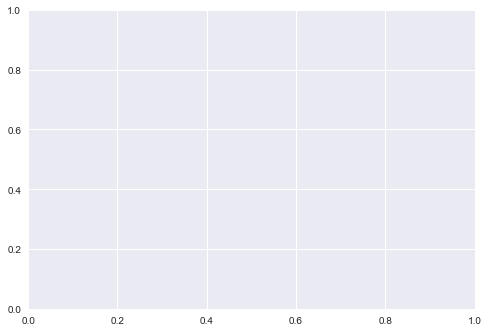

In [20]:
visualizeClassifier(bag, Xtrain, ytrain)

# Boosting
## Adaboost Classifier

In [21]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(Xtrain, ytrain)

ypred = clf.predict(Xtest)
# (true labels, predicted)
print("Accuracy:", metrics.accuracy_score(ytest, ypred)*100)
# (true labels, predicted)
print("Confusion Matrix:\n", metrics.confusion_matrix(ytest, ypred))
# (predicted, true labels)
print("Classification Report:\n", metrics.classification_report(ypred, ytest))


Accuracy: 76.77165354330708
Confusion Matrix:
 [[149  21]
 [ 38  46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.83       187
           1       0.55      0.69      0.61        67

   micro avg       0.77      0.77      0.77       254
   macro avg       0.71      0.74      0.72       254
weighted avg       0.79      0.77      0.78       254



## Gradient Boosting Classifier

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0)
clf.fit(Xtrain, ytrain)

ypred = clf.predict(Xtest)
# (true labels, predicted)
print("Accuracy:", metrics.accuracy_score(ytest, ypred)*100)
# (true labels, predicted)
print("Confusion Matrix:\n", metrics.confusion_matrix(ytest, ypred))
# (predicted, true labels)
print("Classification Report:\n", metrics.classification_report(ypred, ytest))


Accuracy: 75.59055118110236
Confusion Matrix:
 [[149  21]
 [ 41  43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83       190
           1       0.51      0.67      0.58        64

   micro avg       0.76      0.76      0.76       254
   macro avg       0.69      0.73      0.70       254
weighted avg       0.78      0.76      0.77       254



## XgBoost Classifier

In [23]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(Xtrain, ytrain)

ypred = clf.predict(Xtest)
# (true labels, predicted)
print("Accuracy:", metrics.accuracy_score(ytest, ypred)*100)
# (true labels, predicted)
print("Confusion Matrix:\n", metrics.confusion_matrix(ytest, ypred))
# (predicted, true labels)
print("Classification Report:\n", metrics.classification_report(ypred, ytest))


Accuracy: 75.98425196850394
Confusion Matrix:
 [[146  24]
 [ 37  47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       183
           1       0.56      0.66      0.61        71

   micro avg       0.76      0.76      0.76       254
   macro avg       0.71      0.73      0.72       254
weighted avg       0.78      0.76      0.77       254



## LightGBM Classifier

In [24]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier()
clf.fit(Xtrain, ytrain)

ypred = clf.predict(Xtest)
# (true labels, predicted)
print("Accuracy:", metrics.accuracy_score(ytest, ypred)*100)
# (true labels, predicted)
print("Confusion Matrix:\n", metrics.confusion_matrix(ytest, ypred))
# (predicted, true labels)
print("Classification Report:\n", metrics.classification_report(ypred, ytest))


Accuracy: 74.40944881889764
Confusion Matrix:
 [[144  26]
 [ 39  45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       183
           1       0.54      0.63      0.58        71

   micro avg       0.74      0.74      0.74       254
   macro avg       0.69      0.71      0.70       254
weighted avg       0.76      0.74      0.75       254



/Users/adeshgautam/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


## CatBoost Classifier

In [25]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(iterations=100)
clf.fit(Xtrain, ytrain)

ypred = clf.predict(Xtest)
# (true labels, predicted)
print("Accuracy:", metrics.accuracy_score(ytest, ypred)*100)
# (true labels, predicted)
print("Confusion Matrix:\n", metrics.confusion_matrix(ytest, ypred))
# (predicted, true labels)
print("Classification Report:\n", metrics.classification_report(ypred, ytest))


Learning rate set to 0.107976
0:	learn: 0.6660441	total: 61.8ms	remaining: 6.11s
1:	learn: 0.6439552	total: 63.8ms	remaining: 3.13s
2:	learn: 0.6226186	total: 66ms	remaining: 2.13s
3:	learn: 0.6032772	total: 68.3ms	remaining: 1.64s
4:	learn: 0.5868094	total: 70.8ms	remaining: 1.34s
5:	learn: 0.5716405	total: 73.1ms	remaining: 1.14s
6:	learn: 0.5598111	total: 75.3ms	remaining: 1000ms
7:	learn: 0.5471228	total: 77.6ms	remaining: 892ms
8:	learn: 0.5400061	total: 80ms	remaining: 809ms
9:	learn: 0.5289986	total: 82.3ms	remaining: 740ms
10:	learn: 0.5213841	total: 84.3ms	remaining: 682ms
11:	learn: 0.5134803	total: 86.8ms	remaining: 637ms
12:	learn: 0.5074072	total: 89.6ms	remaining: 600ms
13:	learn: 0.4989843	total: 91.6ms	remaining: 563ms
14:	learn: 0.4933347	total: 93.8ms	remaining: 531ms
15:	learn: 0.4891515	total: 96.1ms	remaining: 505ms
16:	learn: 0.4819843	total: 98.4ms	remaining: 480ms
17:	learn: 0.4756578	total: 101ms	remaining: 459ms
18:	learn: 0.4704029	total: 103ms	remaining: 438